## Projeto 2 - Análise de dados dos passageiros do Titanic
##### Por Nikolas Thorun

In [1]:
# importa as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando o arquivo para dentro da variável
titanic_pd = pd.read_csv('D:/Udacity/P2/titanic_data.csv')

Utilizarei o DataFrame porque, ao importar os dados, as colunas não vêm apenas com tipos 'string'; isso facilita a parte de limpeza, pois não precisarei mudar os tipos das colunas.

### Introdução
Antes de começar a explorar os dados, se faz necessária a formulação de algumas perguntas. Assim, os dados poderão ser analisados de forma a respondê-las. <br/>
* Qual é a média de idade dos passageiros? <br/>
* Qual é a média de idade dos passageiros, separada por sexo? <br/>
* Qual a proporção entre sobreviventes e não sobreviventes? <br/>
* Há diferença significativa nas proporções de sobreviventes entre os sexos? <br/>
* A idade é um fator significante na taxa de sobrevivência? <br/>
* Os passageiros da primeira classe tiveram a maior proporção de sobreviventes? <br/>
Sabe-se que o Titanic passou por três cidades antes de partir para Nova York: <br/>
* Existe diferença significativa nas taxas de sobrevivênvia das cidades? <br/>
* Podemos tirar algumas conclusões a respeito dessas cidades, analisando seus passageiros? <br/>
* Existe relação entre idade e preço dos tickets? Ou seja, as pessoas mais velhas têm mais dinheiro para comprar passagens mais caras? <br/>
As respostas serão dadas abaixo.

In [3]:
# Contando o total de passageiros e os passageiros que tem o campo 'idade' preenchido
print titanic_pd['PassengerId'].count()
print titanic_pd['Age'].count()

891
714


### Limpeza de Dados

No DataFrame importado, temos 891 passageiros, porém somente 714 possuem o campo de idade preenchido.
Existem pessoas com a idade estimada, mas usarei as idades estimadas como estão para não diminuir mais o número da amostra.
Não mudarei o tipo da coluna "Survived" para booleano, pois o usarei para indicar a proporção de sobreviventes.

In [4]:
# Remover apenas os passageiros sem idade descrita
titanic_pd = titanic_pd[np.isfinite(titanic_pd['Age'])]

In [5]:
# conferindo os valores pra ver se batem
len(titanic_pd)

714

Ok, agora tenho todos os 714 passageiros que possuem idade descrita, mesmo que estimada.

### Análise dos Dados

Qual é a média de idade dos passageiros? Qual é a proporção de sobreviventes?

In [6]:
# mostra as principais estatísticas sobre o DataFrame
titanic_pd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Média de idade dos passageiros: aproximadamente 30 anos<br/> 
Poporção de sobreviventes: 0.40, ou 40% <br/>

Qual é a frequência de passageiros, por faixa de idade?

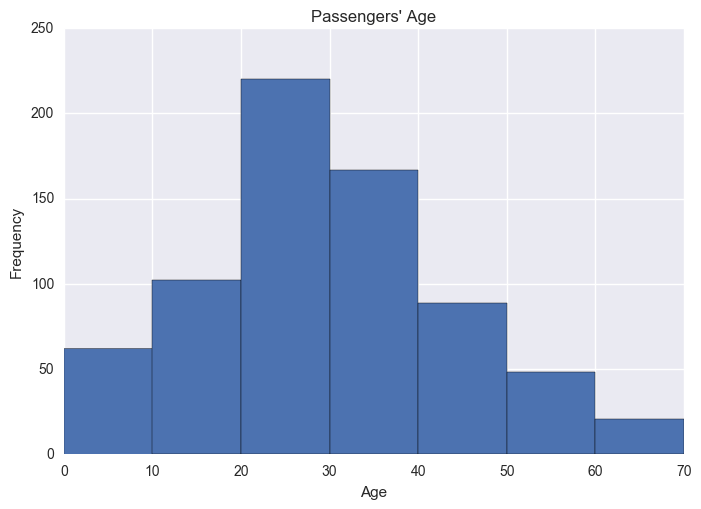

In [7]:
# O histograma abaixo mostra a distribuição de idade dos passageiros por faixas de 10 anos.
plt.hist(titanic_pd['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70])
plt.title("Passengers' Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Qual é o número de passageiros por sexo? <br/>
Qual são as médias de idade dos homens e das mulheres?

In [8]:
print titanic_pd['PassengerId'].groupby(titanic_pd['Sex']).count()
titanic_pd['Age'].groupby(titanic_pd['Sex']).mean()

Sex
female    261
male      453
Name: PassengerId, dtype: int64


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Média das 261 Mulheres: Aproximadamente 28 anos <br/>
Média dos 453 Homens: Aproximadamente 31 anos <br/>
Mas por quê tantos homens a mais do que mulheres? 453/714 ~ 0.63 <br/>
Aproximadamente 63% dos passageiros da amostra analisada são do sexo masculino.

In [9]:
# Separando os passageiros entre sobreviventes e não sobreviventes e verificando os números
survived = titanic_pd.loc[titanic_pd['Survived']==1]
died = titanic_pd.loc[titanic_pd['Survived']==0]
print len(survived)
print len(died)

290
424


Verificação: <br/>
290/(290+424) = 0.40 <br/>
Ok, está correto.

Qual é a média de idade entre os sobreviventes?

In [10]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,290.000000,290.0,290.000000,290.000000,290.000000,290.000000,290.000000
mean,457.768966,1.0,1.872414,28.343690,0.493103,0.527586,51.843205
std,250.845515,0.0,0.836617,14.950952,0.731132,0.807147,70.458776
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,260.500000,1.0,1.000000,19.000000,0.000000,0.000000,13.000000
50%,452.000000,1.0,2.000000,28.000000,0.000000,0.000000,26.250000
75%,669.500000,1.0,3.000000,36.000000,1.000000,1.000000,66.200000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


Média de idade entre os sobreviventes: aproximadamente 28 anos <br/>

Qual é a média de idade entre os não sobreviventes?

In [11]:
died.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,424.000000,424.0,424.000000,424.000000,424.000000,424.000000,424.000000
mean,442.299528,0.0,2.485849,30.626179,0.525943,0.365566,22.965456
std,264.739548,0.0,0.743633,14.172110,1.044760,0.878341,31.448825
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,200.750000,0.0,2.000000,21.000000,0.000000,0.000000,7.895800
50%,436.000000,0.0,3.000000,28.000000,0.000000,0.000000,11.887500
75%,683.250000,0.0,3.000000,39.000000,1.000000,0.000000,26.550000
max,891.000000,0.0,3.000000,74.000000,5.000000,6.000000,263.000000


Média de idade entre os não sobreviventes: aproximadamente 31 anos <br/>

Qual é a proporção de sobreviventes e não sobreviventes, por faixa de idade?

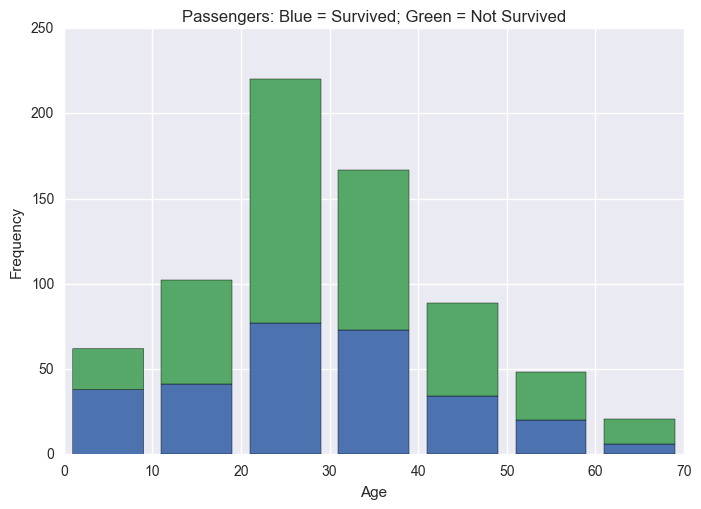

In [12]:
# O histograma abaixo mostra a distribuição de idade dos passageiros por faixas de 10 anos agrupados por
# sobreviventes/não sobreviventes
x1 = survived['Age']
x2 = died['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True)
plt.title("Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Dividindo os grupos de sobreviventes e não sobreviventes por sexo
survived_men = survived.loc[survived['Sex']=="male"]
survived_women = survived.loc[survived['Sex']=="female"]
died_men = died.loc[died['Sex']=="male"]
died_women = died.loc[died['Sex']=="female"]

Há diferença significativa nas proporções de sobreviventes entre os sexos?

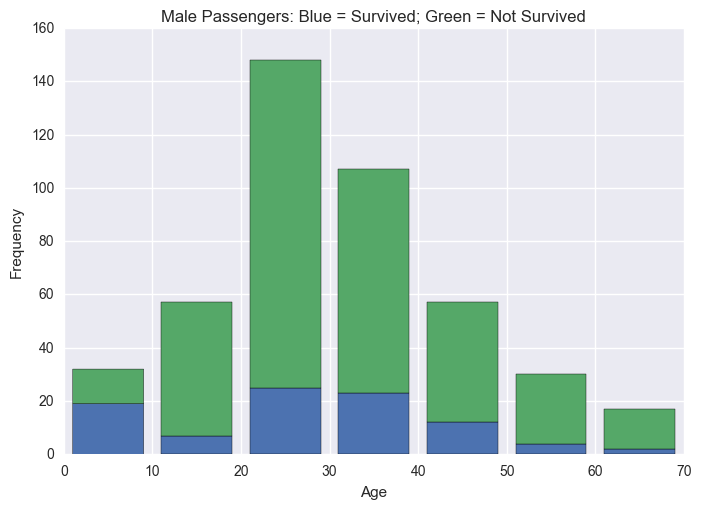

In [14]:
# O histograma abaixo mostra a distribuição de idade dos passageiros homens por faixas de 10 anos agrupados por
# sobreviventes/não sobreviventes
x1 = survived_men['Age']
x2 = died_men['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True)
plt.title("Male Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

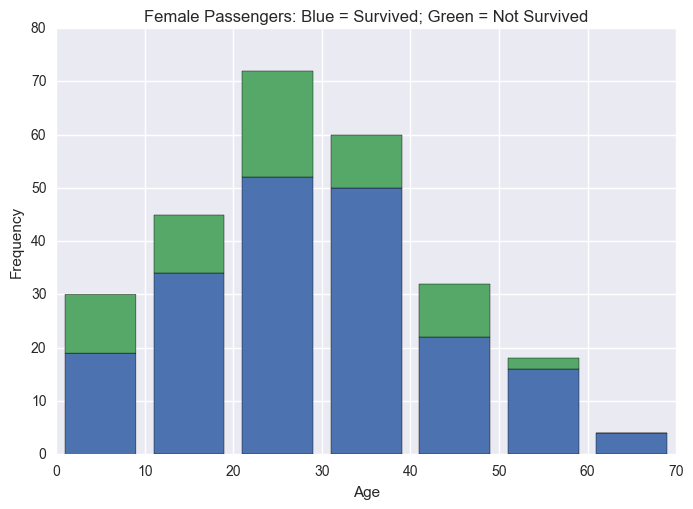

In [15]:
# O histograma abaixo mostra a distribuição de idade das passageiras mulheres por faixas de 10 anos agrupados por
# sobreviventes/não sobreviventes
x1 = survived_women['Age']
x2 = died_women['Age']
plt.hist([x1,x2], bins=[0, 10, 20, 30, 40, 50, 60, 70], stacked=True)
plt.title("Female Passengers: Blue = Survived; Green = Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Os gráficos acima dão uma idéia de proporção, mas para termos uma idéia em números absolutos, teríamos que somar
# os números de cada subdivisão
# Para ver o número de homens e mulheres agrupados por sobreviventes e não sobreviventes:
print "Homens sobreviventes: " , len(survived_men)
print "Mulheres sobreviventes: " , len(survived_women)
print "Homens que morreram: " , len(died_men)
print "Mulheres que morreram: " , len(died_women)


Homens sobreviventes:  93
Mulheres sobreviventes:  197
Homens que morreram:  360
Mulheres que morreram:  64


A proporção de mulheres sobreviventes é 2x maior que a de homens sobreviventes.
Por isso a média de idade entre os sobreviventes é mais parecida com a média de idade das mulheres;
e a média de idade entre os não sobreviventes é mais parecida com a média de idade dos homens <br/>
Os homens significam quase 85% dos mortos.


In [17]:
# Média de sobreviventes por sexo - Para termos uma idéia em números relativos
titanic_pd['Survived'].groupby(titanic_pd['Sex']).mean()


Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

Apenas 20% dos homens sobreviveram <br/>
Enquanto 75% das mulheres sobreviveram  <br/>
Por que?  <br/>
É possível que tenham dado preferência para mulheres e crianças na hora de embarcarem nos botes salva-vidas <br/>

Dentre as crianças, quantas sobreviveram e quantas morreram? <br/>
E de quais classes elas eram?


In [18]:
print "Crianças sobreviventes: ",survived['PassengerId'][survived['Age']<=14].count()
print "Crianças não sobreviventes: ",died['PassengerId'][died['Age']<=14].count()
print "Sobreviventes agrupados por classe: ",survived['PassengerId'][survived['Age']<=14].groupby(titanic_pd['Pclass']).count()
print "Não sobreviventes agrupados por classe: ",died['PassengerId'][died['Age']<=14].groupby(titanic_pd['Pclass']).count()
print "Sobreviventes agrupados por sexo: ",survived['PassengerId'][survived['Age']<=14].groupby(titanic_pd['Sex']).count()
print "Não sobreviventes agrupados por sexo: ",died['PassengerId'][died['Age']<=14].groupby(titanic_pd['Sex']).count()

Crianças sobreviventes:  45
Crianças não sobreviventes:  32
Sobreviventes agrupados por classe:  Pclass
1     4
2    19
3    22
Name: PassengerId, dtype: int64
Não sobreviventes agrupados por classe:  Pclass
1     1
3    31
Name: PassengerId, dtype: int64
Sobreviventes agrupados por sexo:  Sex
female    24
male      21
Name: PassengerId, dtype: int64
Não sobreviventes agrupados por sexo:  Sex
female    14
male      18
Name: PassengerId, dtype: int64


Parece mesmo que as crianças ganharam prioridade para embarcar nos botes,
podemos ver que a porcentagem de crianças sobreviventes é de quase 60%, sendo que a maioria dos não sobreviventes
era da terceira classe. Como a terceira classe era a parte mais baixa do navio, é possível que boa parte dessas crianças
não tenha nem mesmo conseguido chegar ao convés, que era onde ficavam os botes. <br/>
A proporção de sobreviventes por sexo entre as crianças prova isso, 21 meninos e 24 meninas.
Enquanto entre os adultos, 93 homens e 197 mulheres. <br/>

Voltando aos passageiros do Titanic como um todo: <br/>
Os passageiros da primeira classe tiveram a maior proporção de sobreviventes?

In [19]:
# Média de sobreviventes por Classe
print "Proporção de sobreviventes por classe: ",titanic_pd['Survived'].groupby(titanic_pd['Pclass']).mean()
print "Número de passageiros por classe: ",titanic_pd['Survived'].groupby(titanic_pd['Pclass']).count()

Proporção de sobreviventes por classe:  Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64
Número de passageiros por classe:  Pclass
1    186
2    173
3    355
Name: Survived, dtype: int64


As classes eram divididas da seguinte maneira no Titanic:
Nos andares mais próximos ao convés, ficava a primeira classe
Nos andares inferiores, mais próximos à casa de máquinas, ficava a terceira classe
E nos andares intermediários, a segunda classe
Como mostra a imagem: 
![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Titanic_cutaway_diagram.png/400px-Titanic_cutaway_diagram.png)

Por estarem mais próximas ao convés, faz sentido a proporção de sobreviventes entre as classes superiores ser maior.

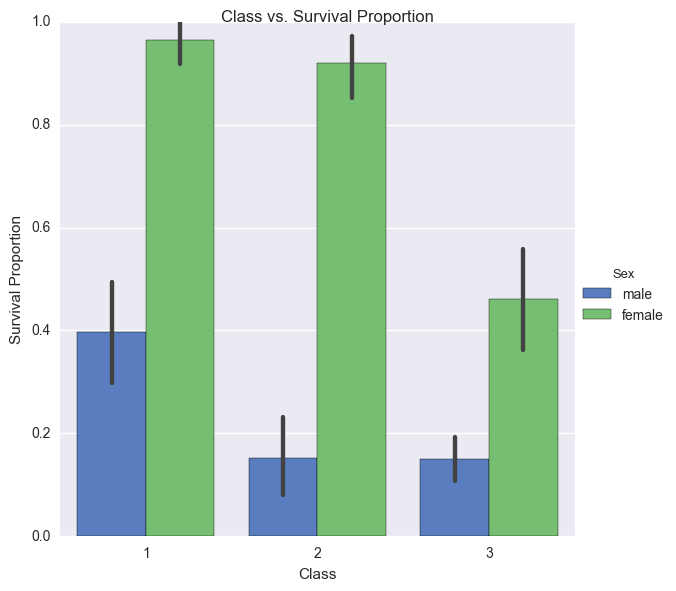

In [20]:
# O histograma abaixo mostra a proporção de sobreviventes por classe, dividido por sexo
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic_pd, size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Class")
g.set_ylabels("Survival Proportion")
g.fig.suptitle("Class vs. Survival Proportion")
plt.show()

In [21]:
# Números absolutos de sobreviventes homens por classe
survived_men['Survived'].groupby(titanic_pd['Pclass']).sum()

Pclass
1    40
2    15
3    38
Name: Survived, dtype: int64

In [22]:
# Números absolutos de sobreviventes mulheres por Classe
survived_women['Survived'].groupby(titanic_pd['Pclass']).sum()

Pclass
1    82
2    68
3    47
Name: Survived, dtype: int64

Podemos ver em números absolutos que os passageiros da primeira classe tiveram maiores chances de sobrevivência, provavelmente por estarem mais próximos ao convés. <br/>

O que podemos dizer sobre as cidades de embarque e seus passageiros?

In [23]:
# Números absolutos de passageiros por cidade de embarque
titanic_pd['PassengerId'].groupby(titanic_pd['Embarked']).count()

Embarked
C    130
Q     28
S    554
Name: PassengerId, dtype: int64

In [24]:
# Média de sobrevivente por cidade de embarque
titanic_pd['Survived'].groupby(titanic_pd['Embarked']).mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

In [25]:
# Média do preço da passagem por cidade de embarque
titanic_pd['Fare'].groupby(titanic_pd['Embarked']).mean()

Embarked
C    68.296767
Q    18.265775
S    27.476284
Name: Fare, dtype: float64

Com as informações acima podemos ter uma certa noção que Southampton é a cidade mais populosa; 
Queenstown é a cidade mais pobre e Cherbourg a cidade mais rica. <br/>
Vamos olhar mais a fundo? <br/>

In [26]:
# Distribuição de passageiros por Classe, na cidade de Cherbourg
titanic_pd['PassengerId'][titanic_pd['Embarked']=="C"].groupby(titanic_pd["Pclass"]).count()

Pclass
1    74
2    15
3    41
Name: PassengerId, dtype: int64

Porcentagem de passageiros da primeira classe = 56%

In [27]:
# Distribuição de passageiros por Classe, na cidade de Queenstown
titanic_pd['PassengerId'][titanic_pd['Embarked']=="Q"].groupby(titanic_pd["Pclass"]).count()

Pclass
1     2
2     2
3    24
Name: PassengerId, dtype: int64

Porcentagem de passageiros da terceira classe = 85%

In [28]:
# Distribuição de passageiros por Classe, na cidade de Southampton
titanic_pd['PassengerId'][titanic_pd['Embarked']=="S"].groupby(titanic_pd["Pclass"]).count()

Pclass
1    108
2    156
3    290
Name: PassengerId, dtype: int64

Porcentagem de passageiros da primeira classe = 20% <br/>
Com isso, confirmamos que Southampton é a cidade mais populosa; Cherbourg a cidade mais elitizada;
e Queenstown a cidade mais pobre e/ou menos populosa.

In [29]:
# Fazer correlação entre idade e preço da passagem
df = pd.read_csv('D:/Udacity/P2/titanic_data.csv', usecols=[5,9])
df.corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


0.096 significa que não há correlação entre as variáveis Idade e Preço da passagem. <br/>
Eu imaginei que as pessoas mais velhas comprariam tickets mais caros. 
Vamos ver num gráfico de dispersão?

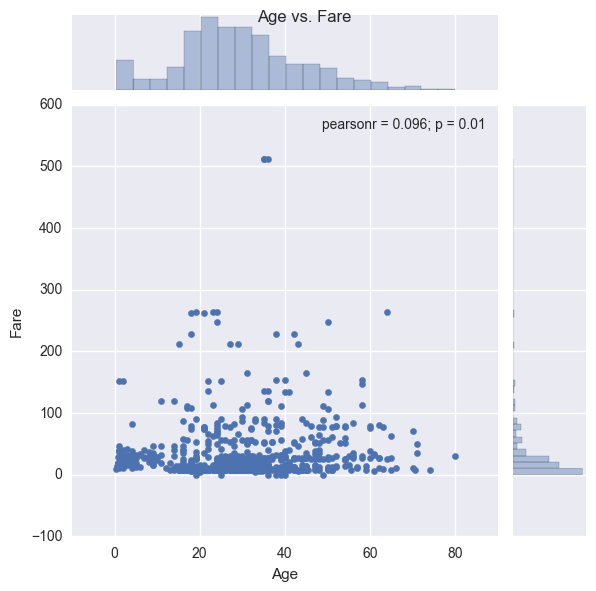

In [30]:
#Plota o gráfico de dispersão
g = sns.jointplot(x="Age", y="Fare", data=df);
g.fig.suptitle("Age vs. Fare")
sns.plt.show()

Podemos ver que realmente as duas variáveis não possuem relação.

In [31]:
# Qual foi o grupo de pelo menos 20 pessoas, com a maior proporção de sobreviventes?
print titanic_pd['Survived'][titanic_pd['Embarked']=="C"][titanic_pd["Sex"]=="female"][titanic_pd["Pclass"]==1][titanic_pd["Age"]<>50].mean()
print titanic_pd['Survived'][titanic_pd['Embarked']=="C"][titanic_pd["Sex"]=="female"][titanic_pd["Pclass"]==1][titanic_pd["Age"]<>50].count()

1.0
36


Todas as 36 mulheres que embarcaram na primeira classe em Cherbourg e tinham idade diferente de 50 anos, sobreviveram.

In [32]:
# Qual foi o grupo de pelo menos 20 pessoas, com a menor proporção de sobreviventes?
print titanic_pd['Survived'][titanic_pd['Embarked']=="S"][titanic_pd["Sex"]=="male"][titanic_pd["Pclass"]==3][titanic_pd["Age"]>=40].mean()
print titanic_pd['Survived'][titanic_pd['Embarked']=="S"][titanic_pd["Sex"]=="male"][titanic_pd["Pclass"]==3][titanic_pd["Age"]>=40].count()

0.0689655172414
29


Dos 29 homens que embarcaram na terceira classe em Southampton, apenas 2 sobreviveram (aproximadamente 7%)

### Limitações

Sabe-se que o navio Titanic zarpou com 1316 passageiros a bordo. Na base de dados constam apenas 891 deles. Seria interessante ter os dados de todos passageiros, assim como os dados da tripulação, que somava 889 pessoas. Além disso acredito que, ao comprar os tickets, as pessoas tenham preenchido uma ficha na qual constam suas profissões. Seria muito interessante comparar o perfil profissional das pessoas a bordo. <br/>

A categoria mais importante com dados faltante foi a idade: de 891 passageiros, somente 714 têm o campo de idade preenchido. Desses, 18 pessoas têm a idade estimada. Outra categoria com dados faltantes que serviria para uma análise mais curiosa é a cabine. Um mapa do navio poderia ser feito relacionando a sobrevivência com a cabine dos passageiros; dessa maneira talvez fosse possível saber qual parte do navio inundou primeiro ou foi mais afetada. <br/>

Além disso, seria de grande valia saber os botes com os quais cada passageiro foi resgatado, assim poderia-se saber se eles foram usados com capacidade máxima ou não para estimar uma quantidade de passageiros que poderiam ser salvos em caso negativo.
Por fim, a título de curiosidade, se o endereço de cada passageiro fosse sabido, poderia-se fazer um mapeamento das áreas que mais sofreram perdas de cada cidade.

### Conclusões
 
A princípio, proporção entre homens e mulheres no navio me deixou em dúvida se havia pessoas da tripulação no meio dos dados.
Como todos os passageiros possuíam classe, inferi que todos eram passageiros e não tripulantes. 
Como o navio zarpou no início do século XX, é possível que houvesse homens viajando a trabalho sem suas esposas, já que estas não estavam inseridas no mercado de trabalho como hoje. <br/>

Logo no ínicio da análise, vemos que a média de idade dos sobreviventes se aproximava muito da média de idade das mulheres e a média de idade dos não sobreviventes se aproximava muito da média de idade dos homens, indicando que o gênero dos passageiros teve um papel importante no índice de sobrevivência. Analisando os histogramas que mostram a sobrevivência por faixa de idade dos dois gêneros, podemos inferir que provavelmente houve uma ordem que privilegiava a entrada das mulheres primeiro nos botes salva-vidas. Nestes mesmos histogramas vemos que a proporção de sobreviventes entre as crianças é bem grande, principalmente entre os meninos. A proporção entre meninos e meninas sobreviventes é de 47%-53%, bem diferente dos 32%-68% entre homens e mulheres sobreviventes. Assim, vemos que as crianças provavelmente também foram privilegiadas para entrar nos botes.

Como era de se esperar, os passageiros da primeira classe tiveram as maiores proporções de sobreviventes, seguido pelos passageiros da segunda classe; os passageiros da terceira classe foram os que menos sobreviveram. Como o acidente aconteceu por volta da meia noite, a maioria dos passageiros estava em seus aposentos. E como os botes ficam no convés, os passageiros da primeira classe, na teoria, demorariam muito menos tempo para chegar até lá. Os passageiros da terceira classe, além de demorar mais tempo para chegar ao convés, ainda tinham que lugar com a água entrando do navio, que inundaram os aposentos da terceira classe primeiro.

Vemos que podemos inferir características das cidades pela quantidade de passageiros e pelos preços pagos por eles. A cidade de Cherbourg, na França, teve a maior proporção de sobreviventes. Não coincidentemente, esta teve a maior média de preços dos tickets, portanto, a maior proporção de passageiros na primeira classe.

Para finalizar, supus que os passageiros mais velhos teriam mais dinheiro para comprar as passagens mais caras, mas como o gráfico de dispersão e o r de Pearson mostraram, a suposição foi errônea.

Para verificar a veracidade das conclusões desta análise, poderiam-se formular hipóteses e realizar testes de hipóteses para confirmá-las ou rejeitá-las. Entretanto, o resultado dos testes não seriam definitivos, devido às limitações dos dados; estes podem ser significativamente diferentes se contemplarem todos os passageiros a bordo.